In [1]:
#Importing dependencies
import numpy as np
import tensorflow as tf
import pandas as pd
import tensorflow.keras as keras
#!pip install gensim
#!pip install google.cloud
#import gzip
import gensim
import logging

# Bag of Words

## Sample Data

In [2]:
corpus = ['king is a strong man','queen is a wise woman','boy is a young man',
          'girl is a young woman','prince is a young','prince will be strong',
          'princess is young','man is strong','woman is pretty', 'prince is a boy',
          'prince will be king', 'princess is a girl', 'princess will be queen']
print(corpus)

['king is a strong man', 'queen is a wise woman', 'boy is a young man', 'girl is a young woman', 'prince is a young', 'prince will be strong', 'princess is young', 'man is strong', 'woman is pretty', 'prince is a boy', 'prince will be king', 'princess is a girl', 'princess will be queen']


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
DTM = cv.fit_transform(corpus)
DTM = pd.DataFrame(DTM.toarray(), columns=cv.get_feature_names_out())
DTM

,be,boy,girl,is,king,man,pretty,prince,princess,queen,strong,will,wise,woman,young
0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
3,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
6,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
7,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
8,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
9,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0


## DTM on Review Data

In [4]:
data = {'review': ['I loved this movie!', 'It was okay.', 'I hated it.', 'It was amazing!', 'I was disappointed.',
                   'It was a great experience.', 'I fell asleep during the movie.', 'It was a total waste of time.',
                   'I highly recommend this movie.', 'I would not recommend this movie.'],
       'sentiment': ['positive', 'neutral', 'negative', 'positive', 'negative',
                      'positive', 'negative', 'negative', 'positive', 'negative']}
df = pd.DataFrame(data)
df

,review,sentiment
0,I loved this movie!,positive
1,It was okay.,neutral
2,I hated it.,negative
3,It was amazing!,positive
4,I was disappointed.,negative
5,It was a great experience.,positive
6,I fell asleep during the movie.,negative
7,It was a total waste of time.,negative
8,I highly recommend this movie.,positive
9,I would not recommend this movie.,negative


In [5]:
# Convert the input data into a DTM
cv = CountVectorizer()
dtm = cv.fit_transform(df['review'])
dtm = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
dtm["y_value"]=df["sentiment"]
# Print the DTM
dtm

,amazing,asleep,disappointed,during,experience,fell,great,hated,highly,it,...,okay,recommend,the,this,time,total,was,waste,would,y_value
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,positive
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,neutral
2,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,negative
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,positive
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,negative
5,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,positive
6,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,1,0,negative
8,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,positive
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,negative


# Word Embeddings

In [6]:
statements = [
"Trees are tall",
"Trees are green",
"Trees are majestic",
"Trees are essential",
"Trees are diverse",
"Trees are oxygen-giving",
"computers are fast",
"computers are smart",
"computers are useful",
"computers are powerful",
"computers are everywhere",
"computers are changing"
]

In [7]:
statements_list = []
for statement in statements:
  statements_list.append(statement.split())
print(statements_list)
from gensim.parsing.preprocessing import STOPWORDS
documents = [[word for word in document if word not in STOPWORDS] for document in statements_list]

[['Trees', 'are', 'tall'], ['Trees', 'are', 'green'], ['Trees', 'are', 'majestic'], ['Trees', 'are', 'essential'], ['Trees', 'are', 'diverse'], ['Trees', 'are', 'oxygen-giving'], ['computers', 'are', 'fast'], ['computers', 'are', 'smart'], ['computers', 'are', 'useful'], ['computers', 'are', 'powerful'], ['computers', 'are', 'everywhere'], ['computers', 'are', 'changing']]


In [8]:
from gensim.models import Word2Vec
model = Word2Vec(documents, min_count=1, vector_size=3, window = 3)
#size： size of word vector, hidden layer
#min-count：discard words that appear less than # times
#window：Context Window size

## Hyperparameters

### size
The hidden nodes size. The size of the dense vector to represent each token or word. If you have very limited data, then size should be a much smaller value. If you have lots of data, its good to experiment with various sizes.

### window
Context window size. The maximum distance between the target word and its neighboring word. If your neighbor's position is greater than the maximum window width to the left and the right, then, some neighbors are not considered as being related to the target word. In theory, a smaller window should give you terms that are more related. If you have lots of data, then the window size should not matter too much, as long as its a decent sized window.

### min_count
Minimium frequency count of words. The model would ignore words that do not statisfy the min_count. Extremely infrequent words are usually unimportant, so its best to get rid of those. Unless your dataset is really tiny, this does not really affect the model.

## Checking the word2vec output

In [9]:
for word, vector in zip(model.wv.index_to_key, model.wv.vectors):
  print(word, vector)

computers [-0.01787424  0.00788105  0.17011166]
Trees [ 0.3003091  -0.31009832 -0.23722696]
useful [ 0.21529575  0.2990996  -0.16718094]
powerful [-0.12544572  0.24601682 -0.05111571]
changing [-0.15122044  0.21846838 -0.16200535]
fast [-0.06053392  0.09588599  0.03306246]
smart [-0.27617383 -0.3149606   0.24372554]
diverse [0.16900873 0.22525644 0.02542885]
oxygen-giving [ 0.21169634 -0.1135122  -0.03154671]
essential [ 0.19228578 -0.25072125 -0.13120346]
majestic [-0.2503861  -0.03100141  0.31793728]
green [-0.24397223 -0.07779229 -0.06459137]
tall [ 0.2692479  -0.19769652  0.00150541]


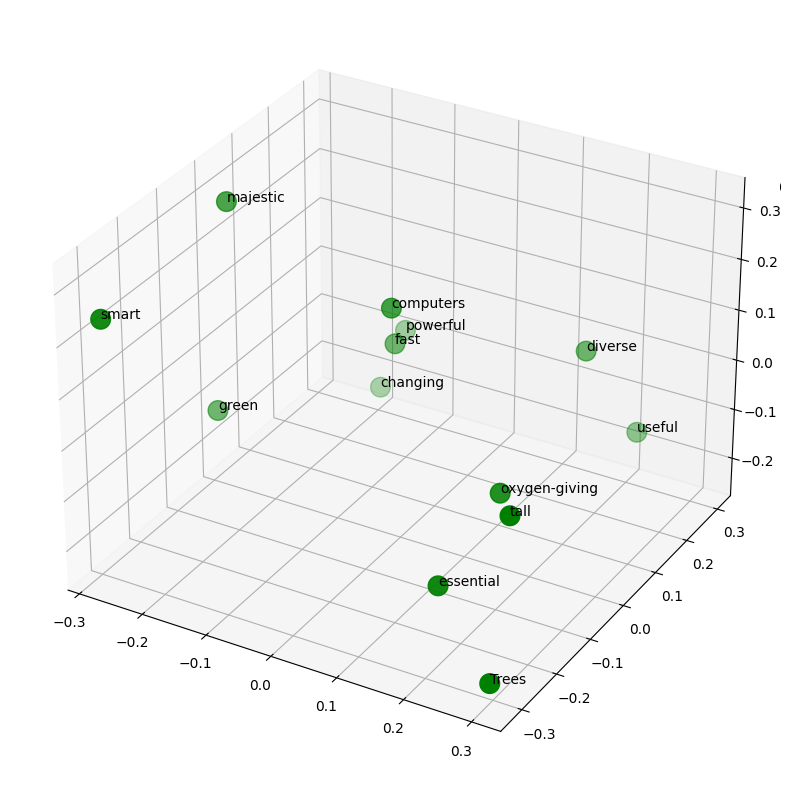

In [10]:
import matplotlib.pyplot as plt
# Visualize the word vectors in 3D space using PCA
vectors = model.wv.vectors


fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')

xdata = vectors[:, 0]
ydata = vectors[:, 1]
zdata = vectors[:, 2]
names=model.wv.index_to_key

ax.scatter3D(xdata, ydata, zdata, s=200 , c='green')
for names, x, y, z in zip(names, xdata, ydata, zdata):
    label = names
    ax.text(x, y, z, label )
plt.show()


# Word2Vec Example-2

In [11]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Amazon_Yelp_Reviews/Review_Data.csv", "Review_Data.csv")
data_file="Review_Data.csv"

In [12]:
def read_input(input_file):
    with open (input_file, 'rb') as f:
        for i, line in enumerate (f):
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)
            # read the tokenized reviews into a list
            # each review item becomes a series of words
            # so this becomes a list of lists
    print("File reading done !!")
documents = list (read_input (data_file))

File reading done !!


In [13]:
print(documents)

[['id', 'review', 'sentiment'], ['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter'], ['good', 'case', 'excellent', 'value'], ['great', 'for', 'the', 'jawbone'], ['tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', 'minutes', 'major', 'problems'], ['the', 'mic', 'is', 'great'], ['have', 'to', 'jiggle', 'the', 'plug', 'to', 'get', 'it', 'to', 'line', 'up', 'right', 'to', 'get', 'decent', 'volume'], ['if', 'you', 'have', 'several', 'dozen', 'or', 'several', 'hundred', 'contacts', 'then', 'imagine', 'the', 'fun', 'of', 'sending', 'each', 'of', 'them', 'one', 'by', 'one'], ['if', 'you', 'are', 'razr', 'owner', 'you', 'must', 'have', 'this'], ['needless', 'to', 'say', 'wasted', 'my', 'money'], ['what', 'waste', 'of', 'money', 'and', 'time'], ['and', 'the', 'sound', 'quality', 'is', 'great'], ['he', 'was', 'very', 'impressed', 'when', 'going', 'from', 'the', 'original', 'battery', 'to',

In [14]:
from gensim.models import Word2Vec
model = Word2Vec(documents, min_count=1, vector_size=10)
#size： size of word vector, hidden layer
#min-count：discard words that appear less than # times
#window：Context Window size

In [15]:
# Print the vectors for a couple of words

for word, vector in zip(model.wv.index_to_key, model.wv.vectors):
  if word in ["good", "bad", "money"]:
    print(word, vector)

good [ 0.5359964  -0.39832243  0.7075087   0.06563445  0.22742793  0.36030298
  1.5013672   0.6971923  -1.3014838  -0.82089096]
bad [ 0.2853481  -0.19828337  0.41285956  0.11769842  0.15411673  0.08889678
  0.68959016  0.39910215 -0.6417049  -0.4008235 ]
money [ 0.17280625 -0.18439016  0.41292068 -0.08308187  0.1525305   0.16950214
  0.5337017   0.3752903  -0.41077724 -0.40302342]


# Word Embeddings on TensorFlow - Sentiment Analysis Project

In [16]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import GlobalAveragePooling1D, Dropout, Embedding, Dense

# Step1.Data Downloading

In [36]:
import

# Download the IMDB dataset
!curl -O https://ai.stanford.edu/~amaas/data/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

# Load the dataset into memory
train_data = imdb.load_data(num_words=10000)

# Split the data into training and testing sets
train_texts = train_data[0]
train_labels = train_data[1]
test_texts = test_data[0]
test_labels = test_data[1]

# Create an embedding layer
embedding_layer = Embedding(
    input_dim=10000,
    output_dim=16,
)

# Create a sequential model
model = keras.Sequential(
    [
        embedding_layer,
        GlobalAveragePooling1D(),
        Dense(16, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

# Compile the model
model.compile(loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(train_texts, train_labels, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_texts, test_labels)
print("Test accuracy:", test_acc)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   227  100   227    0     0   1462      0 --:--:-- --:--:-- --:--:--  1464
tar: This does not look like a tar archive

gzip: stdin: not in gzip format
tar: Child returned status 1
tar: Error is not recoverable: exiting now


NameError: name 'imdb' is not defined

Data Contains Several positive and negative reviews

In [17]:
!gdown https://drive.google.com/u/0/uc?id=1DWm8nOX2nIXU4-1trQE--AcqkmcM8J_K -O aclImdb_v1.tar.gz

Downloading...
From (original): https://drive.google.com/u/0/uc?id=1DWm8nOX2nIXU4-1trQE--AcqkmcM8J_K
From (redirected): https://drive.google.com/uc?id=1DWm8nOX2nIXU4-1trQE--AcqkmcM8J_K&confirm=t&uuid=7416f6d1-9220-4b12-af77-637884959364
To: /content/aclImdb_v1.tar.gz
100% 84.1M/84.1M [00:01<00:00, 71.4MB/s]


In [18]:
!ls  # Data file downloaded - Check it

aclImdb_v1.tar.gz  Review_Data.csv  sample_data


In [19]:
!tar -zxvf 'aclImdb_v1.tar.gz' # Untar the dataset

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [20]:
!ls ./aclImdb/ # Display the contents of the folder

imdbEr.txt  imdb.vocab	README	test  train


## 1.1 Sample Reviews

In [21]:
train_dir="/content/aclImdb/train"
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


# Step2.Create Train and Test Data

In [22]:
shutil.rmtree(os.path.join(train_dir, 'unsup')) # Removing 'unsup' folder. Not required here

train_datagen = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', # Train data Folder
    validation_split=0.2,  #80% Train and 20% Test
    subset='training',
    seed=55 #Seed is used to to make sure that evertime we get the same train and test data
    )

test_datagen = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train',
    validation_split=0.2,
    subset='validation',
    seed=55)


Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


## 2.1 Samples after making train and test data

In [23]:
for text_batch, label_batch in train_datagen.take(1):
  for i in range(5):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b"All Dogs Go To Heaven Is The Most Cutest Animated Film To Have Dogs In 1989. The Previous Don Bluth Film The Land Before Time(1988) Became A Success. Dogs Are So Cute As Little Mice. Aw, I Just Want To Hug Them When They're Cute. Where Was I? Oh, Yes. Its Animation Is Beautiful, The Characters Are Great When They're Perfectly Voiced And The Songs Are Cute And Touching. It Opened In November 17 1989 The Same Date As The Little Mermaid Produced By Walt Disney Feature Animation.<br /><br />The Part Where Charlie Got Killed By Carface Was So Unforgivable. Carface Is So Mean Because He Wanted To Kill Charlie. Shame On Him! The Love Survive Song Performed By Irene Cara And Freddie Jackson Was So Beautiful. All Dogs Go To Heaven Is The Best Animated Movie Ever."
Label 1
Review b'I still can\'t believe that Wes Craven was responsible for this piece of crap.This movie is worse than "Deadly Friend".The plot is stupid,the acting is mediocre and the film is deadly dull.I don\'t know why W

In [24]:
for text_batch, label_batch in test_datagen.take(1):
  for i in range(5):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b"POSSIBLE SPOILERS<br /><br />The Spy Who Shagged Me is a muchly overrated and over-hyped sequel. International Man of Mystery came straight out of the blue. It was a lone star that few people had heard of. But it was stunningly original, had sophisticated humour and ample humour, always kept in good taste, and had a brilliant cast. The Spy Who Shagged Me was a lot more commercially advertised and hyped about.<br /><br />OK I'll admit, the first time I saw this film I thought it was very funny, but it's only after watching it two or three times that you see all the flaws. The acting was OK, but Heather Graham cannot act. Her performance didn't seem very convincing and she wasn't near as good as Liz Hurley was in the first one. Those characters who bloomed in the first one, (Scott Evil, Number 2 etc.) are thrown into the background hear and don't get many stand-alone scenes. The film is simply overrun with cameos.<br /><br />In particular, I hated the way they totally disregarde

# Step3.Data Pre-processing - Also known as "standardizing"

*   Remove punctuation
*   Remove HTML tags



In [25]:
def pre_process(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')  #Remove HTML tags like <br />
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),  #Remove HTML links
                                  '')

# Step4.Mapping words to numbers - Also known as TextVectorization

In [26]:
vocab_size = 20000    #Limiting the maximum vocab size in the overall data. take only top frequent words
max_sequence_length = 250 #Limiting the maximum length of input sequence of words in a single review

vectorize_layer = TextVectorization(
    standardize=pre_process,
    max_tokens=vocab_size,
    output_sequence_length=max_sequence_length # Truncate large sequences or pad with '0' if the sequence is short
    )

# Define "vectorize_text" function to create the sequnce of integers
train_text = train_datagen.map(lambda x, y: x) # Take only x data, reviews only ; ignore y data - lables
vectorize_layer.adapt(train_text) #Adapt function used to convert the index of strings to integers.

def vectorize_text(text, label):
  text = tf.expand_dims(text, -1) #One extra dimention will be added at the end. Which will be later used to fill the output col
  return vectorize_layer(text), label #Output is the number sequence and label

## Sample output of the mapping
for text_batch, label_batch in train_datagen.take(1):
  first_review, first_label = text_batch[0], label_batch[0] # Get a sample review
  print("Review \n", first_review)
  print("Label for the review ==> ", train_datagen.class_names[first_label])

  #Printing the results
  print("Vectorized review\n", vectorize_text(first_review, first_label)) #Use vectorize_text function to map to numbers

Review 
 tf.Tensor(b'This is surely one of the worst films ever made and released by a major Hollywood studio. The plot is simply stupid. The dialog is written in clich\xc3\xa9s; you can complete a great many sentences in the script because of this. The acting is ridiculously bad, especially that of Rod Cameron. The "choreography" is silly and wholly unerotic. One can only pity the reviewer who saw 23-year-old Yvonne\'s dance as sexual; it\'s merely very bad choreography. The ballet scene in the film\'s beginning is especially ludicrous. If you are into bad movies and enjoy laughing at some of Hollywood\'s turkeys, this is for you. I bought the colorized version on VHS, making the movie even worse. Yvonne\'s heavy makeup, when colored, has her looking like a clown all the time. And she\'s the best part of this film. What a way to launch a career.', shape=(), dtype=string)
Label for the review ==>  neg
Vectorized review
 (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[   11,   

In [27]:
# Final Mapping on Train and Test data
train_df = train_datagen.map(vectorize_text)
test_df = test_datagen.map(vectorize_text)

# Step5.Model building

In [28]:
embedding_dim = 16  # Lenghth of Embeddings
model = tf.keras.Sequential()
model.add(Embedding(input_dim=vocab_size + 1, output_dim=embedding_dim))
# input_dim =(1 + maximum integer index occurring in the input data)
# output_dim= Lenghth of Embeddings
model.add(Dropout(0.3))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.3))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          320016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 320033 (1.22 MB)
Trainable params: 320033 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [29]:
model.compile(loss=losses.BinaryCrossentropy(), optimizer='adam', metrics = ['accuracy'])

In [30]:
model.fit(train_df,validation_data=test_df,epochs=10)

Epoch 1/10
625/625 [==============================] - 54s 82ms/step - loss: 0.7486 - accuracy: 0.5583 - val_loss: 0.6306 - val_accuracy: 0.8226
Epoch 2/10
625/625 [==============================] - 16s 26ms/step - loss: 0.5715 - accuracy: 0.7416 - val_loss: 0.4961 - val_accuracy: 0.8320
Epoch 3/10
625/625 [==============================] - 9s 14ms/step - loss: 0.4296 - accuracy: 0.8332 - val_loss: 0.4030 - val_accuracy: 0.8620
Epoch 4/10
625/625 [==============================] - 7s 12ms/step - loss: 0.3573 - accuracy: 0.8697 - val_loss: 0.3901 - val_accuracy: 0.8730
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3147 - accuracy: 0.8906 - val_loss: 0.3823 - val_accuracy: 0.8784
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2868 - accuracy: 0.9043 - val_loss: 0.3852 - val_accuracy: 0.8840
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2591 - accuracy: 0.9126 - val_loss: 0.3892 - val_accuracy: 0.8858


## 5.1Saving and loading the model

In [31]:
model.save_weights('Senti_model_word2Vec_10epochs.h5')
#model.save('Senti_model_word2Vec_10epochs.h5')

Loading a pre-trained model

In [32]:
model.load_weights('Senti_model_word2Vec_10epochs.h5')
model.fit(train_df,validation_data=test_df,epochs=1)

625/625 [==============================] - 3s 5ms/step - loss: 0.1985 - accuracy: 0.9372 - val_loss: 0.4326 - val_accuracy: 0.8912


## 5.2 The model for final prediction

In [33]:
#Final model for prediction is more than simple prediction from ANN, it we need to include pre-processing also
final_model = tf.keras.Sequential([
  vectorize_layer, # Vectorization layer
  model, # ANN Model
  layers.Activation('sigmoid') # Result
])

final_model.compile(loss=losses.BinaryCrossentropy(), optimizer="adam", metrics=['accuracy'])

# Step6 Prediction using the model

In [34]:
examples = [
  "Best indian movie ever.an amazing directer SS Rajamouli made a movie in 2015 with a sequel in 2017  that managed to hit theatres all over the world and also   non indians watched it and gave good reviews.all genres are well mixed -action,drama,romance a little bit of comedy makes bahubali the best.Amazing CGI  says IN YOUR FACE to other indian movies.amazing cinematography,story,makeup and BGM.",
  "Might be an expensive movie, but acting was horrible and no plot whatsoever. Very predictable throughout. And on top of that bad direction, acting was extremely bad. Wasted three hours of my life.",
  "What a fantastic performance from all the actors especially Prabhas , putting all his effort and skill in making this fantasy come alive and yet so captivating, I love the wardrobe functions on all the actors , the elegance and pure magic put together just brings this movie to another level. The producers, directors & choreographers and all extra stunt mans have done such an amazing job , HATS OFF TO ALL OF YOU .In a nut shell Baahubali ranks top on all the  fantasy movies listed."]

In [35]:
predictions=final_model.predict(examples)
print(["pos" if i >0.5 else "neg" for i in predictions])

1/1 [==============================] - 0s 229ms/step
['pos', 'neg', 'pos']
